<a href="https://colab.research.google.com/github/lapatradaa/DAC_VideoDataset/blob/main/MainVdo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean Data

In [46]:
# special columns to say our goal , etc , etc


In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re,string,unicodedata
import numpy as np
import seaborn as sns

In [48]:
# from google.colab import drive
# drive.mount('/content/drive')

In [49]:
data = pd.read_csv('/Users/jovan/Documents/VSCode-Source/DAC-Code/mini-project/videos.csv', encoding='ISO-8859-1') # to read for original data 
df = pd.read_csv('/Users/jovan/Documents/VSCode-Source/DAC-Code/mini-project/videos.csv', encoding='ISO-8859-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [50]:
df.columns = df.columns.str.replace('_', ' ').str.title()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   Subscribers                              995 non-null    int64  
 3   Video Views                              995 non-null    float64
 4   Category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   Uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   Channel Type                             965 non-null    object 
 10  Video Views Rank                         994 non-n

In [51]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [52]:
del df['Rank'] # not important
del df['Created Date']
del df['Abbreviation']
df = df[df['Video Views'] != 0]

In [53]:
 # remove special characters from the columns 
df['Youtuber'] = df['Youtuber'].apply(remove_special_characters)
df['Title'] = df['Title'].apply(remove_special_characters) 

In [54]:
# check for null value 
df.isnull().sum() 
 

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Category                                    39
Title                                        0
Uploads                                      0
Country                                    116
Channel Type                                28
Video Views Rank                             1
Country Rank                               110
Channel Type Rank                           30
Video Views For The Last 30 Days            51
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Lowest Yearly Earnings                       0
Highest Yearly Earnings                      0
Subscribers For Last 30 Days               330
Created Year                                 5
Created Month                                5
Gross Tertiary Education Enrollment (%)    117
Population                                 117
Unemployment 

In [55]:
df['Youtuber'] = df['Youtuber'].replace(r'^\s*$', np.nan, regex=True)
df['Title'] = df['Title'].replace(r'^\s*$', np.nan, regex=True)

print(f'Youtube null value : {df["Youtuber"].isna().sum()}\nTitle null value : {df["Title"].isna().sum()}')

Youtube null value : 16
Title null value : 16


In [56]:
df = df.dropna(subset=['Youtuber', 'Title'])
print(f'Youtube null value : {df["Youtuber"].isna().sum()}\nTitle null value : {df["Title"].isna().sum()}')

Youtube null value : 0
Title null value : 0


In [57]:
df['Urban Population'] = df['Urban Population'].fillna(df['Urban Population'].mean()) # fill the null value with mean value
df['Population'] = df['Population'].fillna(df['Population'].mean()) 
df['Unemployment Rate'] = df['Unemployment Rate'].fillna(df['Unemployment Rate'].mean()) 
df['Gross Tertiary Education Enrollment (%)'].fillna(df['Gross Tertiary Education Enrollment (%)'].mean(), inplace=True) 

df['Category'] = df['Category'].fillna("Unknown") # fill the null value with mode value

df['Country'] = df['Country'].fillna("Other") # other because not all countries are here 
df['Channel Type'] = df['Channel Type'].fillna("Other") # fill the null value with mode value

df['Country Rank'] = df['Country Rank'].fillna(0) # put 0 as this is done because the country doesnt exist in the data , so the country rank is also not generated
df ['Channel Type Rank'] = df['Channel Type Rank'].fillna(0) 

In [58]:
print(df['Channel Type'].unique())

['Music' 'Entertainment' 'Education' 'People' 'Sports' 'Film' 'News'
 'Other' 'Games' 'Comedy' 'Howto' 'Nonprofit' 'Autos' 'Tech' 'Animals']


In [59]:
df.isnull().sum() 

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Category                                     0
Title                                        0
Uploads                                      0
Country                                      0
Channel Type                                 0
Video Views Rank                             1
Country Rank                                 0
Channel Type Rank                            0
Video Views For The Last 30 Days            50
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Lowest Yearly Earnings                       0
Highest Yearly Earnings                      0
Subscribers For Last 30 Days               327
Created Year                                 5
Created Month                                5
Gross Tertiary Education Enrollment (%)      0
Population                                   0
Unemployment 

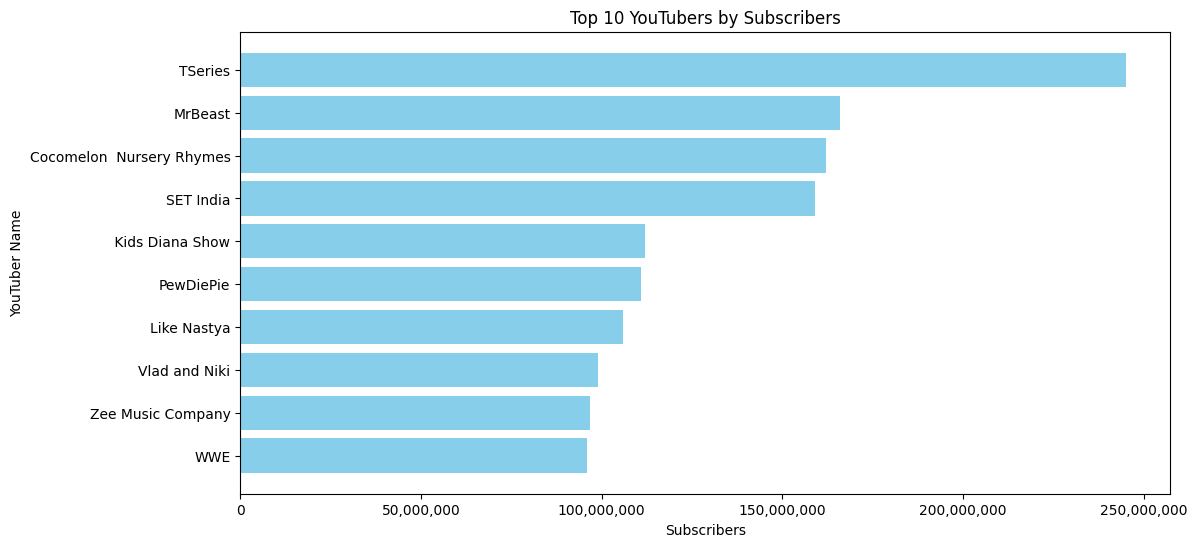

In [60]:
# top 10 youtubers by subs
top_10 = df.sort_values('Subscribers', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_10['Youtuber'], top_10['Subscribers'], color='skyblue')
plt.xlabel('Subscribers')
plt.ylabel('YouTuber Name')
plt.title('Top 10 YouTubers by Subscribers')
plt.gca().invert_yaxis()  # to display the YouTuber with the most subscribers at the top

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # show full number instead of rounded 

plt.show()

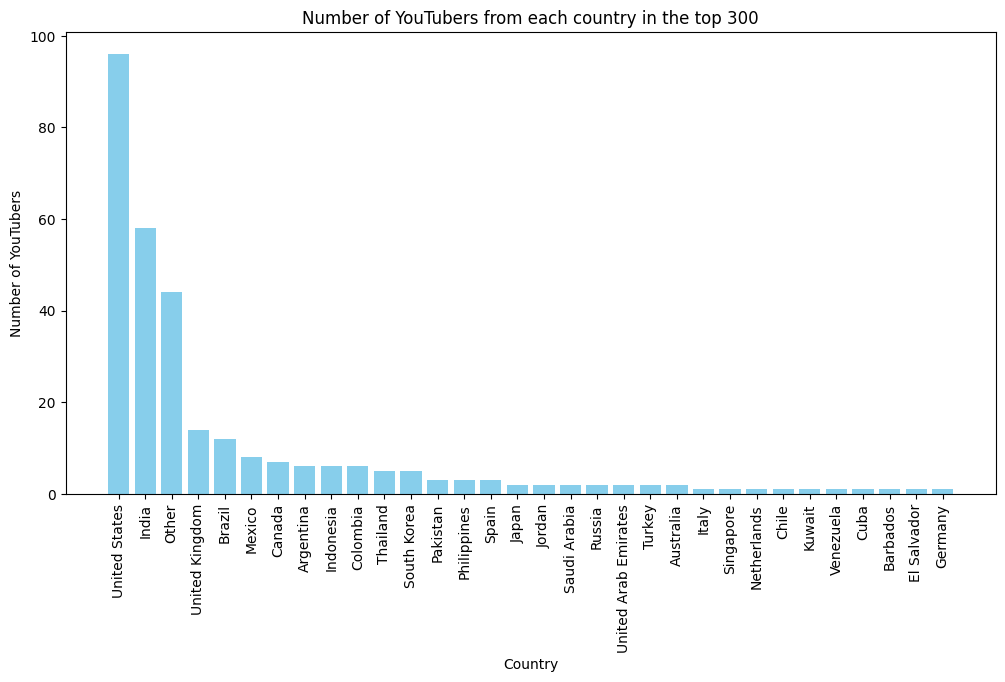

In [61]:
top_300 = df.sort_values('Subscribers', ascending=False).head(300)

country_counts = top_300['Country'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of YouTubers')
plt.title('Number of YouTubers from each country in the top 300')
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.show()

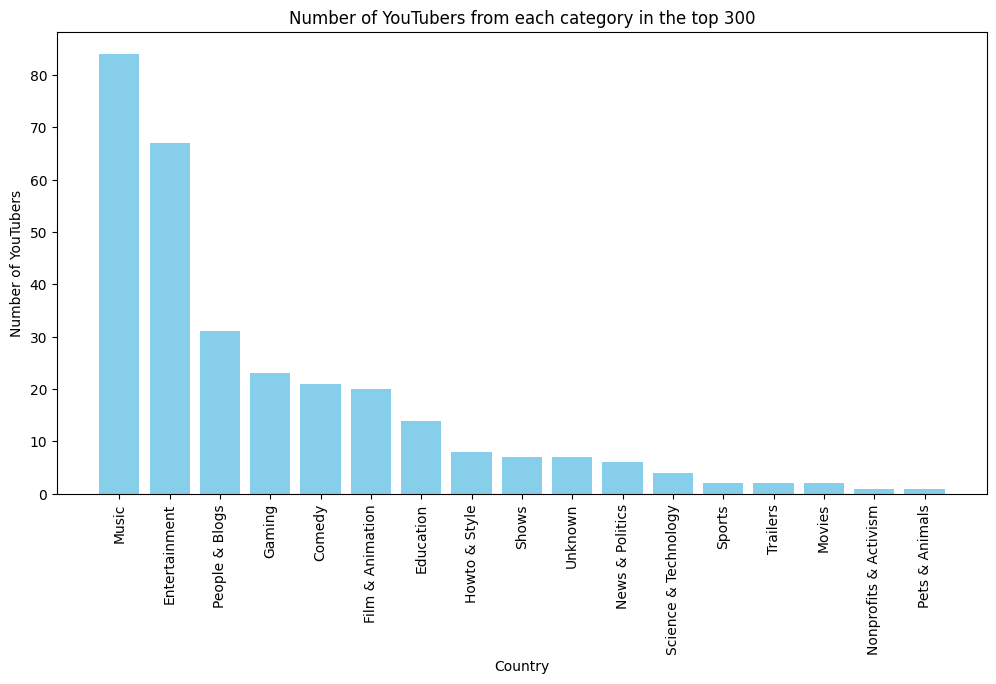

In [62]:
top_300 = df.sort_values('Subscribers', ascending=False).head(300)

category_counts = top_300['Category'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of YouTubers')
plt.title('Number of YouTubers from each category in the top 300')
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.show()

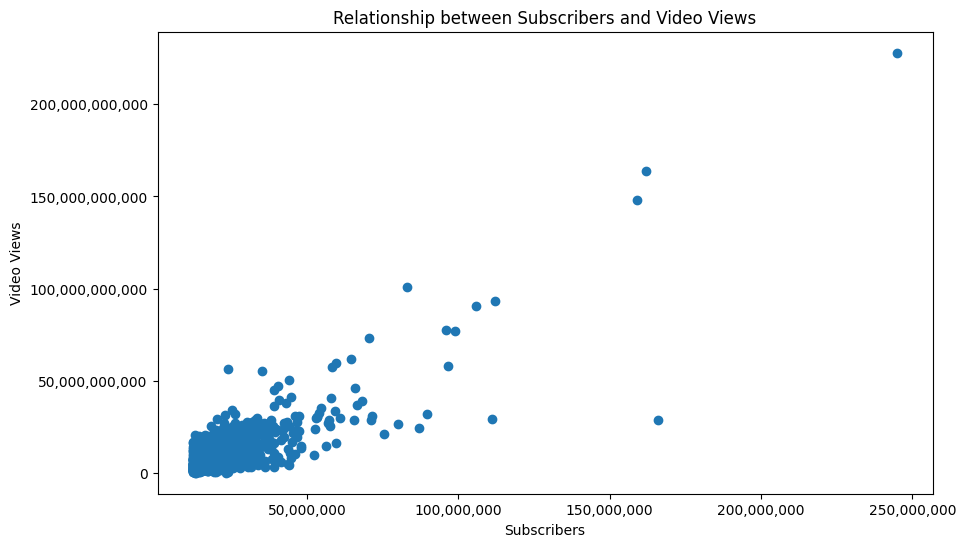

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(df['Subscribers'], df['Video Views'])
# plt.boxplot(df['Subscribers'])
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.title('Relationship between Subscribers and Video Views')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # show full number instead of rounded 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

<Axes: >

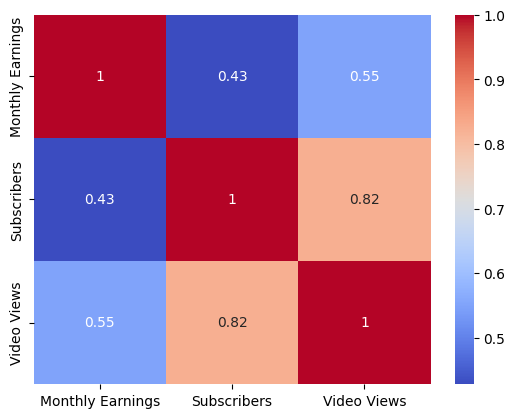

In [64]:
df['Monthly Earnings'] = (df['Highest Monthly Earnings'] + df['Lowest Monthly Earnings']) / 2
df['Yearly Earnings'] = df['Highest Yearly Earnings'] + df['Lowest Yearly Earnings'] / 2

correlation = df[['Monthly Earnings', 'Subscribers', 'Video Views']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
print('test123')